# Project 11: Chapter 8: Advanced Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3", "Year"],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})
data.tail()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20572\3579266558.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("fraserDataWithRGDPPC.csv",


ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
ZWE        2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   
           2019-01-01                          4.026568     1.413372   
           2020-01-01                          3.965267     1.250000   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
ZWE        2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   
           2019-01-01                          6.397045    6.132583   
           2020-01-01                          5.565207    6.080774   

                       Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
ISO_Code_3 Year                                                                
ZWE        2016-01-01                               1.498126        1534.0000  
           2017-01-01                               1.631512        1582.3662  
           2018-01-01                               1.262218        1611.4052  
           2019-01-01                               2.064439              NaN  
           2020-01-01                               1.975388              NaN

In [2]:
years = data.index.get_level_values("Year").unique()
countries = data.index.get_level_values("ISO_Code_3").unique()
years, countries

(DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
                '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
                '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
                '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
                '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
                '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
                '2018-01-01', '2019-01-01', '2020-01-01'],
               dtype='datetime64[ns]', name='Year', freq=None),
 Index(['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
        ...
        'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
       dtype='object', name='ISO_Code_3', length=165))

In [3]:
data.index

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1980-01-01'),
            ('AGO', '1985-01-01'),
            ('AGO', '1990-01-01'),
            ('AGO', '1995-01-01'),
            ('AGO', '2000-01-01'),
            ('AGO', '2001-01-01'),
            ('AGO', '2002-01-01'),
            ('AGO', '2003-01-01'),
            ...
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01'),
            ('ZWE', '2016-01-01'),
            ('ZWE', '2017-01-01'),
            ('ZWE', '2018-01-01'),
            ('ZWE', '2019-01-01'),
            ('ZWE', '2020-01-01')],
           names=['ISO_Code_3', 'Year'], length=4455)

In [4]:
def create_indicator_variable(data, indicator_name,
                              index_name, target_index_list):
    data[indicator_name] = 0
    for index in target_index_list:
        data.loc[data.index.get_level_values(index_name) == index, [indicator_name]] = 1
# slect ISO_Code_3
index_name = data.index.names[0]
indicator_name = "North America"
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV", 
                              "GTM", "HTI", "HND", "JAM","MEX", "NIC", "PAN",
                              "TTO", "USA"]
create_indicator_variable(data = data,
                          indicator_name = indicator_name,
                          index_name = index_name,
                          target_index_list = countries_in_north_america)
data.tail()

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
ZWE        2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   
           2019-01-01                          4.026568     1.413372   
           2020-01-01                          3.965267     1.250000   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
ZWE        2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   
           2019-01-01                          6.397045    6.132583   
           2020-01-01                          5.565207    6.080774   

                       Standard Deviation of the 5 EFW Areas  RGDP Per Capita  \
ISO_Code_3 Year                                                                 
ZWE        2016-01-01                               1.498126        1534.0000   
           2017-01-01                               1.631512        1582.3662   
           2018-01-01                               1.262218        1611.4052   
           2019-01-01                               2.064439              NaN   
           2020-01-01                               1.975388              NaN   

                       North America  
ISO_Code_3 Year                       
ZWE        2016-01-01              0  
           2017-01-01              0  
           2018-01-01              0  
           2019-01-01              0  
           2020-01-01              0

In [5]:
# alternate strategy using pandas features
data.loc[countries_in_north_america, "North America"] = 1
data.loc[countries_in_north_america, "North America"]

ISO_Code_3  Year      
BHS         1970-01-01    1
            1975-01-01    1
            1980-01-01    1
            1985-01-01    1
            1990-01-01    1
                         ..
USA         2016-01-01    1
            2017-01-01    1
            2018-01-01    1
            2019-01-01    1
            2020-01-01    1
Name: North America, Length: 432, dtype: int64

In [6]:
data.loc[countries_in_north_america]["Countries"].unique()

array(['Bahamas, The', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
       'Dominican Republic', 'El Salvador', 'Guatemala', 'Haiti',
       'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
       'Trinidad and Tobago', 'United States'], dtype=object)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20572\3684116225.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', 2)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_20572\3684116225.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


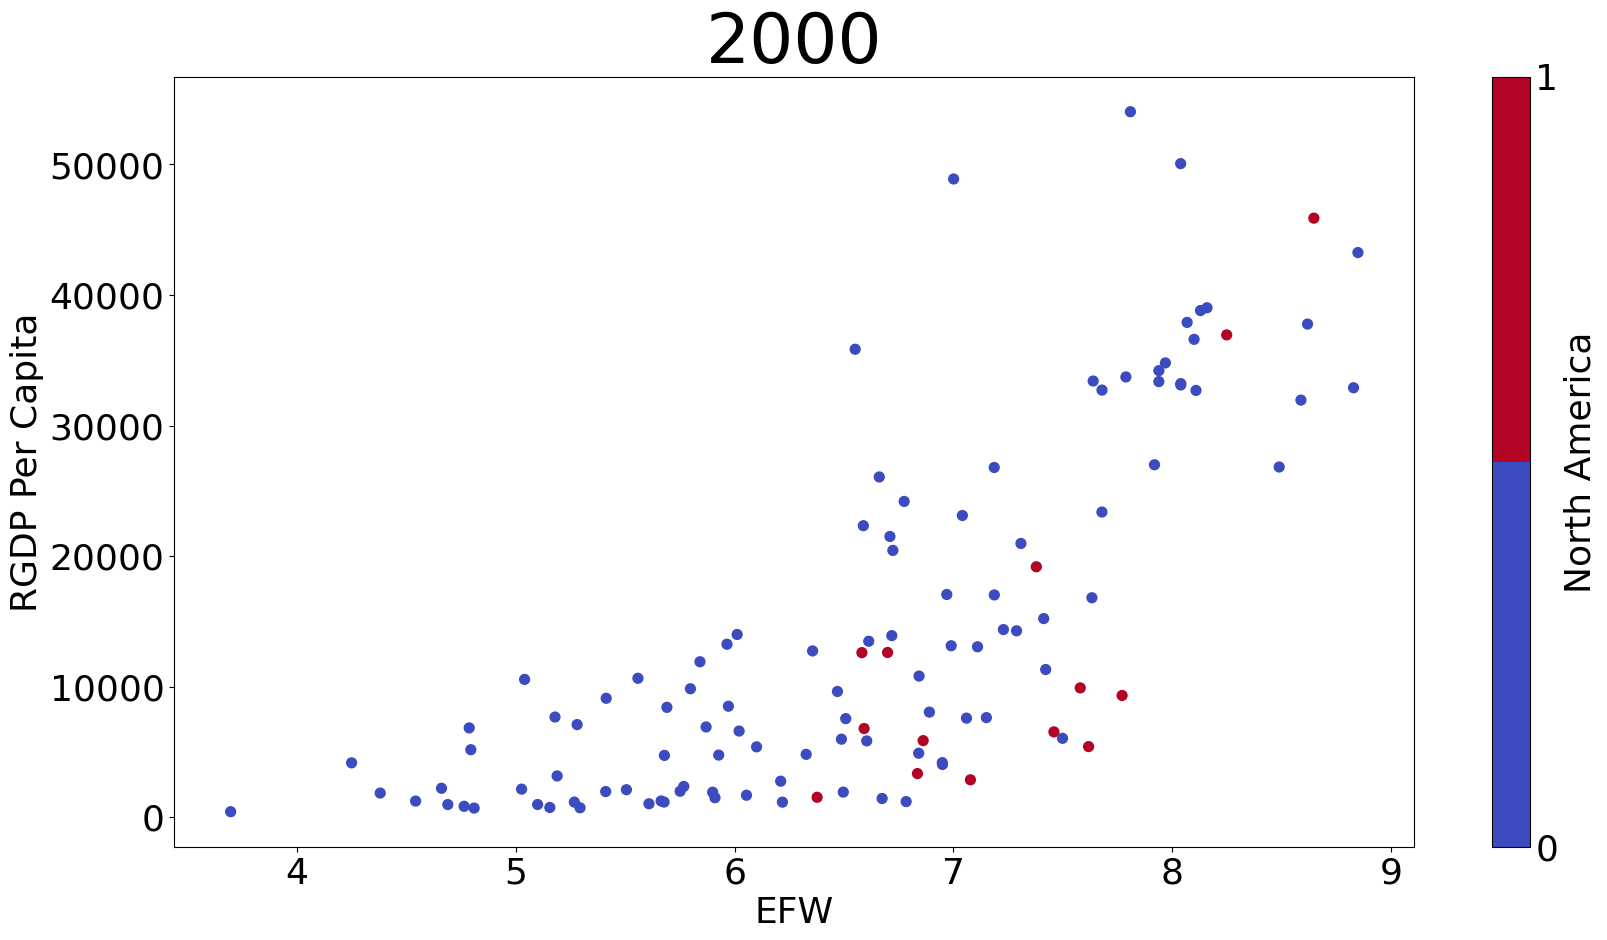

In [7]:
import datetime
from matplotlib import cm
plt.rcParams.update({"font.size":26})
year = 2000
 ###### Discretize the Colorbar ############
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
############################################
plot_data = data[data.index.get_level_values("Year") == datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita",
                       c = "North America",
                       #### Make sure to use cmap=cmap, not cmap="coolwarm"
                       cmap = cmap,
                       s = 50, 
                       ax = ax)
ax.set_title(str(year), fontsize = 50)
##### Only include 1 and 0 for cbar values, romve tick lines ########
f = plt.gcf()
cax = f.get_axes()[1]
vals = cax.get_yticks()
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
cax.tick_params(length = 0)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20572\666937959.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', 2)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_20572\666937959.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


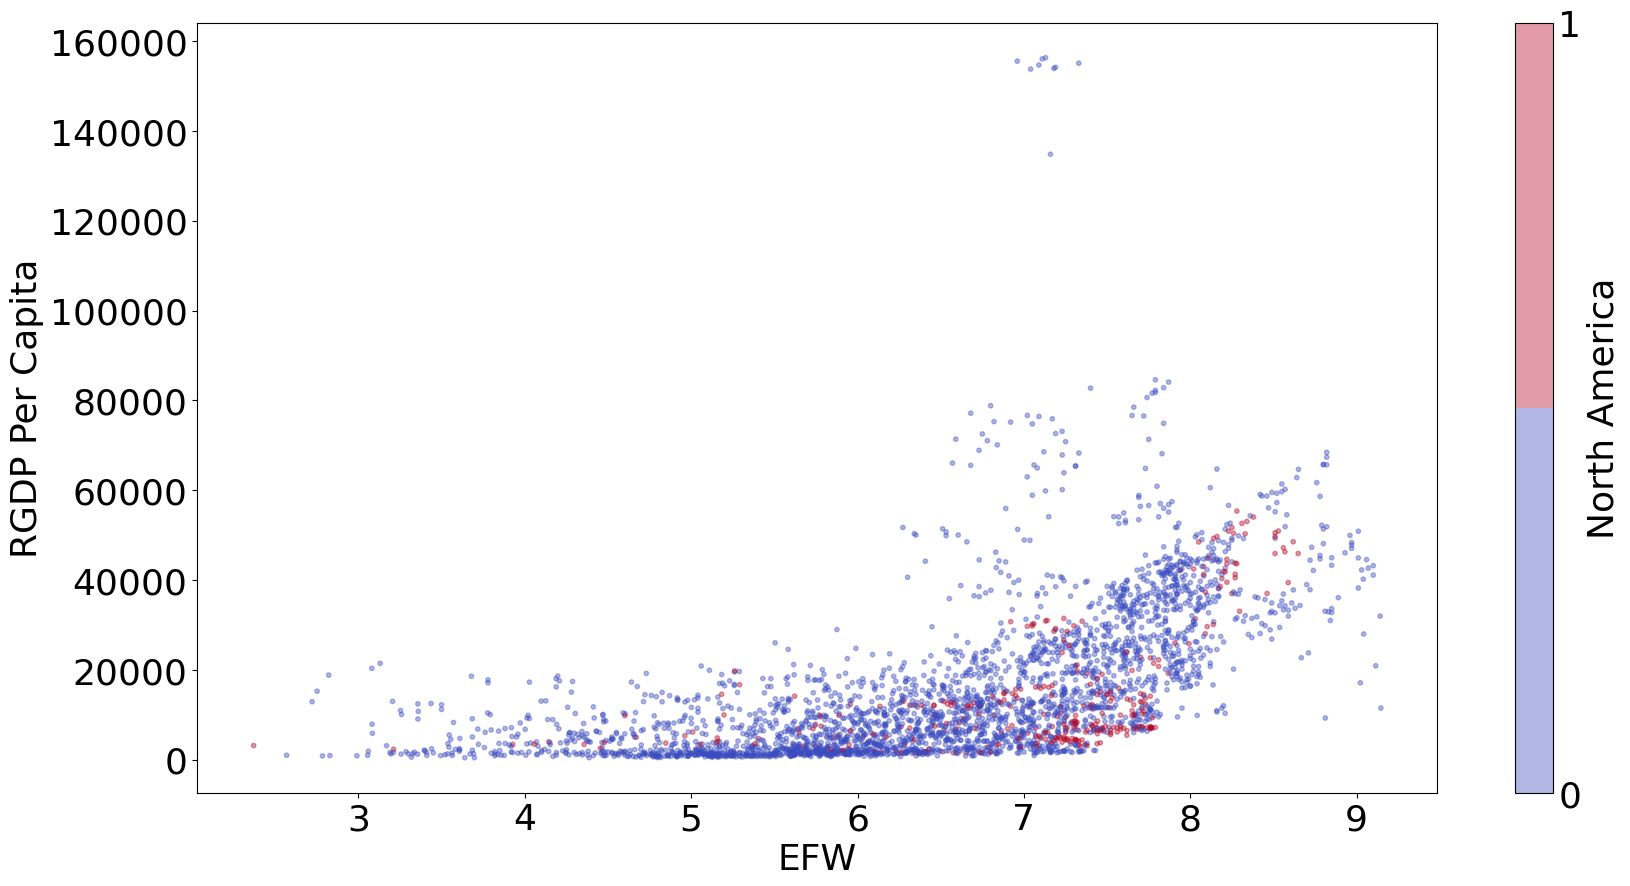

In [8]:
import datetime
from matplotlib import cm
plt.rcParams.update({"font.size":26})
 ###### Discretize the Colorbar ############
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
############################################
plot_data = data
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita",
                       c = "North America",
                       #### Make sure to use cmap=cmap, not cmap="coolwarm"
                       cmap = cmap,
                       s = 10, 
                       alpha = .4,
                       ax = ax)
##### Only include 1 and 0 for cbar values, romve tick lines ########
f = plt.gcf()
cax = f.get_axes()[1]
vals = cax.get_yticks()
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
cax.tick_params(length = 0)

In [9]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan

In [10]:
def create_quantile(n,
                    data,
                    year,
                    quantile_var,
                    quantile_name):
    year_index = data.index.get_level_values("Year") == year
    # identify quantiles by year
    quantile_values_dict = {i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n+1)}
    for index in data[year_index].index:
        val = data.loc[index][quantile_var]
        for i in range(1, n + 1):
            if val <= quantile_values_dict[i]:
                data.loc[index, [quantile_name]] = int((n + 1) - i)
                break
            else:
                continue
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

In [11]:
# data.loc[["USA", "GBR"], "RGDP Per Capita 5-tile"]
data.tail()

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
ZWE        2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   
           2019-01-01                          4.026568     1.413372   
           2020-01-01                          3.965267     1.250000   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
ZWE        2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   
           2019-01-01                          6.397045    6.132583   
           2020-01-01                          5.565207    6.080774   

                       Standard Deviation of the 5 EFW Areas  RGDP Per Capita  \
ISO_Code_3 Year                                                                 
ZWE        2016-01-01                               1.498126        1534.0000   
           2017-01-01                               1.631512        1582.3662   
           2018-01-01                               1.262218        1611.4052   
           2019-01-01                               2.064439              NaN   
           2020-01-01                               1.975388              NaN   

                       North America  RGDP Per Capita 5-tile  
ISO_Code_3 Year                                               
ZWE        2016-01-01              0                     5.0  
           2017-01-01              0                     5.0  
           2018-01-01              0                     5.0  
           2019-01-01              0                     NaN  
           2020-01-01              0                     NaN

In [12]:
data["RGDP Per Capita"].groupby("Year").quantile([.2,.4,.6,.8,1])
# data["RGDP Per Capita"].median()

Year           
1970-01-01  0.2     1468.0
            0.4     2847.8
            0.6     5847.6
            0.8    10137.6
            1.0    51921.0
                    ...   
2020-01-01  0.2        NaN
            0.4        NaN
            0.6        NaN
            0.8        NaN
            1.0        NaN
Name: RGDP Per Capita, Length: 135, dtype: float64

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20572\978437600.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("jet", n)


Text(0.5, 1.0, 'Year: 2016')

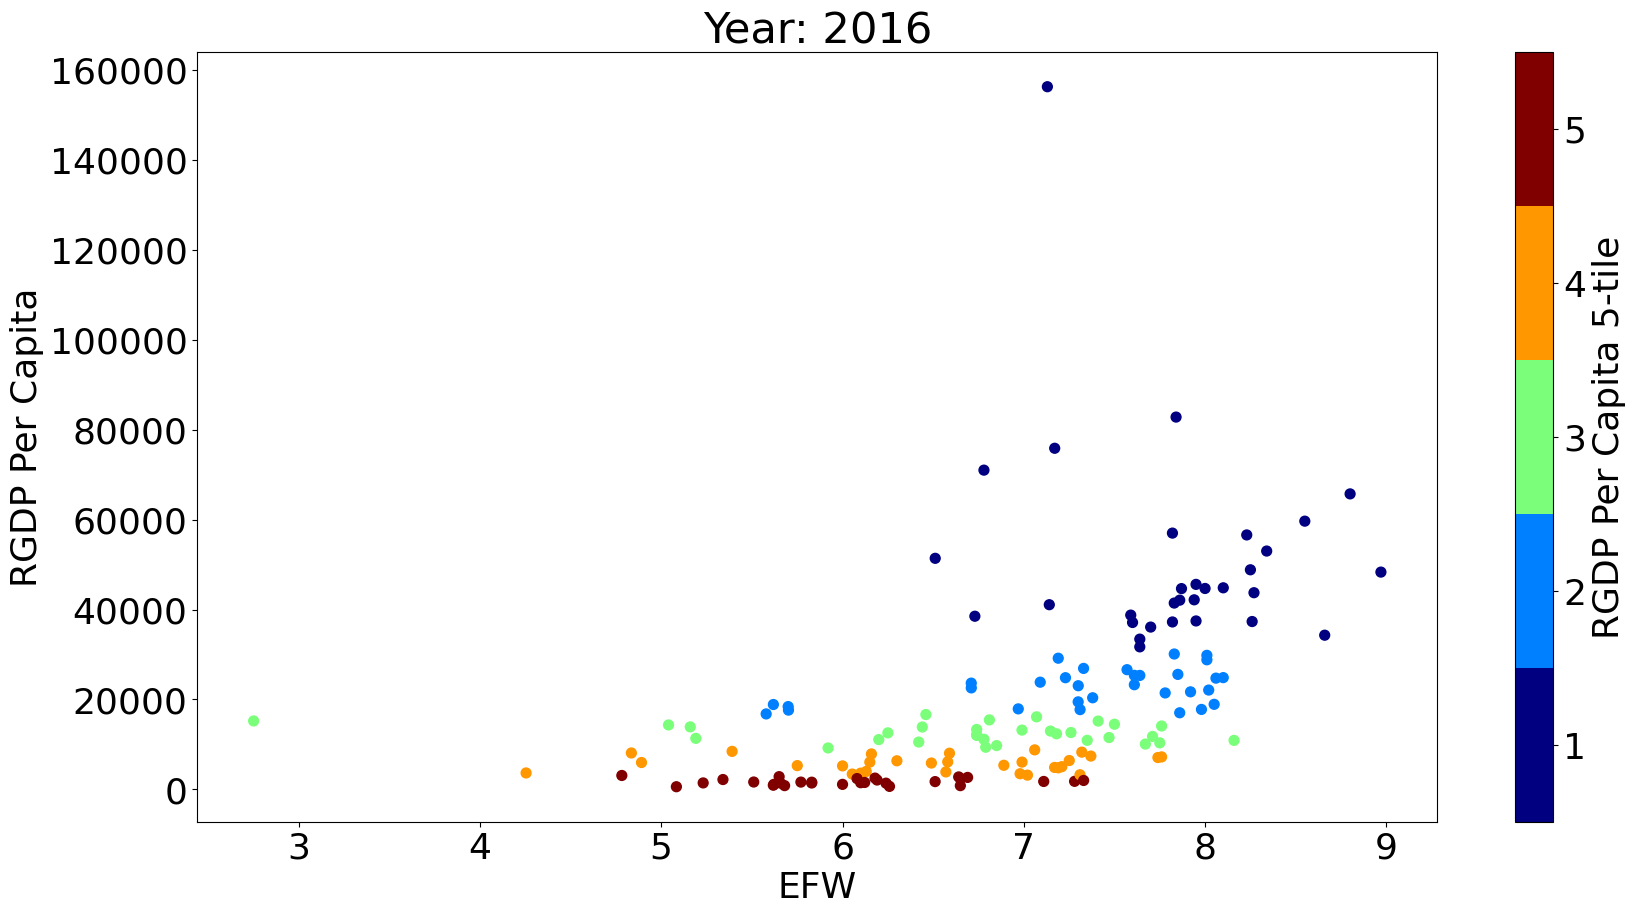

In [13]:
year = 2016
plot_data = data[data.index.get_level_values("Year") == datetime.datetime(year, 1,1)]
fig, ax = plt.subplots(figsize = (20,10))
norm = cm.colors.Normalize()
cmap = cm.get_cmap("jet", n)

plot_data.plot.scatter(x="EFW", 
                       y = "RGDP Per Capita",
                       c = "RGDP Per Capita " + str(n) + "-tile",
                       cmap = cmap,
                       ax = ax, s = 50,
                       legend =False, vmin = 0.5, vmax = 5.5)
ax.set_title(f"Year: {year}")